# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.464  1  0.911 0.341 0.005   
                             age        0.094  1  0.184 0.669 0.001   
                             Kiel       2.034  1  3.995 0.047 0.020   
                             Magdeburg  4.709  1  9.247 0.003 0.046   
                             Sweden     8.587  1 16.862 0.000 0.081   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.182  1  0.187 0.666 0.001   
                             age        2.541  1  2.602 0.108 0.013   
                             Kiel       0.064  1  0.066 0.798 0.000   
                             Magdeburg  3.997  1  4.092 0.044 0.021   
                             Sweden    12.773  1 13.078 0.000 0.064   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.467  0.506    False  
                             age               0.175  0.785    False  
                             Kiel              1.327  0.116    False  
                             Magdeburg         2.570  0.011     True  
                             Sweden            4.225  0.000     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.176  0.783    False  
                             age               0.965  0.224    False  
                             Kiel              0.098  0.877    False  
                             Magdeburg         1.352  0.111    False  
                             Sweden            3.418  0.002     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.716  1  4.588 0.033 0.023   
                             age        0.004  1  0.025 0.874 0.000   
                             Kiel       0.358  1  2.292 0.132 0.012   
                             Magdeburg  0.889  1  5.694 0.018 0.029   
                             Sweden     2.273  1 14.566 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         6.785  1  3.497 0.063 0.018   
                             age        3.914  1  2.018 0.157 0.010   
                             Kiel      10.013  1  5.161 0.024 0.026   
                             Magdeburg 10.352  1  5.336 0.022 0.027   
                             Sweden     2.699  1  1.391 0.240 0.007   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.475  0.082    False  
                             age               0.059  0.923    False  
                             Kiel              0.881  0.243    False  
                             Magdeburg         1.745  0.050     True  
                             Sweden            3.738  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.201  0.136    False  
                             age               0.804  0.277    False  
                             Kiel              1.616  0.064    False  
                             Magdeburg         1.658  0.059    False  
                             Sweden            0.620  0.379    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.341         0.467  0.506    False   
                             age       0.669         0.175  0.785    False   
                             Kiel      0.047         1.327  0.116    False   
                             Magdeburg 0.003         2.570  0.011     True   
                             Sweden    0.000         4.225  0.000     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.666         0.176  0.783    False   
                             age       0.108         0.965  0.224    False   
                             Kiel      0.798         0.098  0.877    False   
                             Magdeburg 0.044         1.352  0.111    False   
                             Sweden    0.000         3.418  0.002     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.033         1.475  0.082    False  
                             age       0.874         0.059  0.923    False  
                             Kiel      0.132         0.881  0.243    False  
                             Magdeburg 0.018         1.745  0.050     True  
                             Sweden    0.000         3.738  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.063         1.201  0.136    False  
                             age       0.157         0.804  0.277    False  
                             Kiel      0.024         1.616  0.064    False  
                             Magdeburg 0.022         1.658  0.059    False  
                             Sweden    0.240         0.620  0.379    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.480     0.338     0.244         2.744     0.310
std       0.303         5.333     0.331     0.297         5.153     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.340     0.015     0.002         0.364     0.008
50%       0.123         0.909     0.247     0.093         1.031     0.186
75%       0.457         2.440     0.610     0.433         2.707     0.577
max       1.000       144.518     1.000     0.999        82.863     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.341         0.467   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.363   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.149         0.827   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.567         0.246   
A0A075B6H7                                         AD     0.076         1.117   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.052         1.285   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.276         0.559   
S4R3U6                                             AD     0.666         0.176   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.506    False   
A0A024R0T9;K7ER74;P02655                           AD      0.109    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.283    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.703    False   
A0A075B6H7                                         AD      0.171    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.319    False   
Q9Y6X5                                             AD      0.125    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.437    False   
S4R3U6                                             AD      0.783    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.033         1.475   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.496   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.342         0.465   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.302         0.520   
A0A075B6H7                                         AD     0.185         0.733   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.099         1.005   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.491         0.309   
S4R3U6                                             AD     0.063         1.201   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.082    False  
A0A024R0T9;K7ER74;P02655                           AD      0.079    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.492    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.450    False  
A0A075B6H7                                         AD      0.314    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.405     0.336     0.248         1.493     0.321
std       0.292         1.631     0.317     0.290         1.795     0.315
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.012         0.364     0.038     0.010         0.364     0.030
50%       0.120         0.921     0.242     0.110         0.957     0.213
75%       0.433         1.934     0.591     0.433         2.019     0.577
max       0.997        22.140     0.998     0.999        26.607     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1028,994


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.341         0.467  0.506   
A0A024R0T9;K7ER74;P02655                           0.043         1.363  0.109   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.149         0.827  0.283   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.567         0.246  0.703   
A0A075B6H7                                         0.076         1.117  0.171   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.319   
Q9Y6X5                                             0.052         1.285  0.125   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.276         0.559  0.437   
S4R3U6                                             0.666         0.176  0.783   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.033   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.342   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.302   
A0A075B6H7                                            False 0.185   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.099   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.491   
S4R3U6                                                False 0.063   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.475  0.082   
A0A024R0T9;K7ER74;P02655                                   1.496  0.079   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.465  0.492   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.520  0.450   
A0A075B6H7                                                 0.733  0.314   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.301   
Q9Y6X5                                                     1.005  0.196   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.309  0.629   
S4R3U6                                                     1.201  0.136   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    959
PI (yes) - QRILC (yes)   358
PI (no)  - QRILC (yes)    69
PI (yes) - QRILC (no)     35
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                               QRILC                \
                  p-unc -Log10 pvalue qvalue rejected p-unc -Log10 pvalue   
protein groups                                                              
A0A075B6I0        0.035         1.456  0.092    False 0.003         2.513   
A0A075B6S5        0.077         1.113  0.172    False 0.013         1.888   
A0A087WWT2;Q9NPD7 0.042         1.376  0.106    False 0.006         2.221   
A0A087WXB8;Q9Y274 0.012         1.924  0.039     True 0.178         0.749   
A0A087X0M8        0.029         1.533  0.080    False 0.005         2.326   
...                 ...           ...    ...      ...   ...           ...   
Q9NUQ9            0.001         3.213  0.003     True 0.075         1.123   
Q9NYX4            0.035         1.453  0.093    False 0.011         1.954   
Q9ULP0-3;Q9ULP0-6 0.003         2.469  0.014     True 0.055         1.256   
Q9UNW1            0.015         1.832  0.046     True 0.123         0.909   
Q9UQ52            0.067         1.173  0.154    False 0.009         2.036   

                                       data  
                  qvalue rejected frequency  
protein groups                               
A0A075B6I0         0.011     True       194  
A0A075B6S5         0.038     True       129  
A0A087WWT2;Q9NPD7  0.020     True       193  
A0A087WXB8;Q9Y274  0.305    False        89  
A0A087X0M8         0.016     True       189  
...                  ...      ...       ...  
Q9NUQ9             0.157    False       114  
Q9NYX4             0.034     True       195  
Q9ULP0-3;Q9ULP0-6  0.123    False       136  
Q9UNW1             0.231    False       171  
Q9UQ52             0.029     True       188  

[104 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.506,0.082,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.109,0.079,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.283,0.492,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.703,0.450,196,PI (no) - QRILC (no)
A0A075B6H7,0.171,0.314,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.319,0.301,197,PI (no) - QRILC (no)
Q9Y6X5,0.125,0.196,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P17302,0.946,0.030,135,PI (no) - QRILC (yes),0.916
E5RK69;E7EMC6;P08133;P08133-2,0.018,0.933,80,PI (yes) - QRILC (no),0.914
Q8NCH0,0.008,0.732,113,PI (yes) - QRILC (no),0.724
Q9NRB3,0.035,0.696,82,PI (yes) - QRILC (no),0.662
P43004;P43004-2;P43004-3,0.640,0.002,89,PI (no) - QRILC (yes),0.638
...,...,...,...,...,...
P07900;P07900-2,0.064,0.044,110,PI (no) - QRILC (yes),0.019
P05160,0.056,0.043,154,PI (no) - QRILC (yes),0.013
K7ERI9;P02654,0.040,0.052,196,PI (yes) - QRILC (no),0.012


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


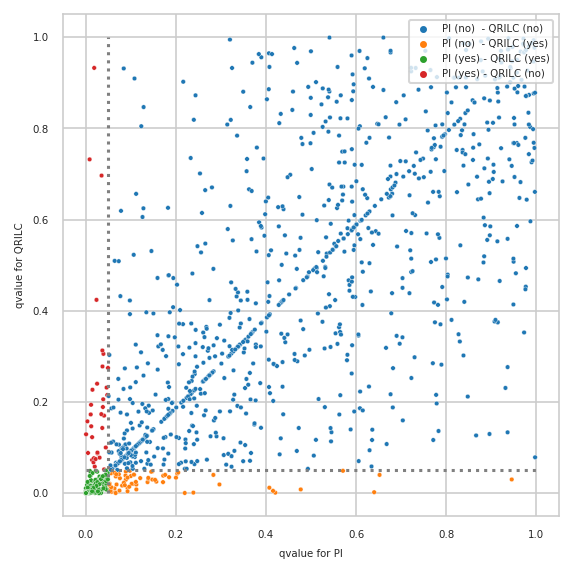

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


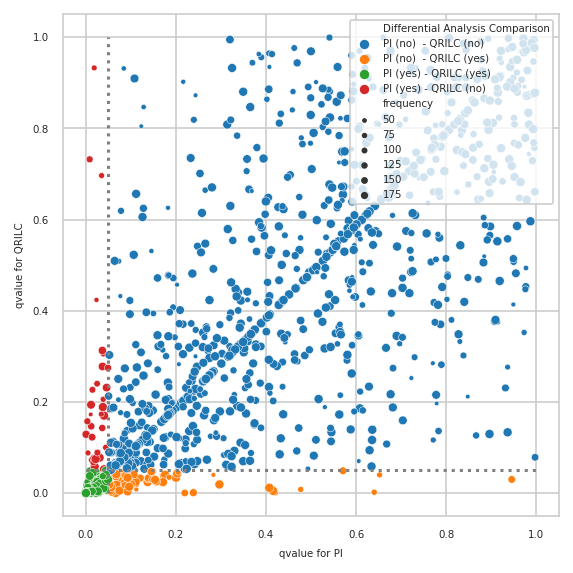

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out